<p style="font-family: Arial; font-size:3.7em; color:purple; font-style:bold">
<br>FANAL RESULTS SHOWCASE<br></p>

This notebook illustrates the results got from FANAL analysis.

It provides contents of generated DataFrames with some associated plots.

#### Setting general stuff

In [1]:
from IPython.core.display import HTML
css = open('css/style-table.css').read() + open('css/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

#### Importings

In [4]:
import os
import sys
import numpy  as np
import tables as tb
import pandas as pd
import matplotlib.pyplot as plt
from   matplotlib.colors import LogNorm

#%matplotlib widget

In [5]:
# Specific IC stuff

import invisible_cities.core.system_of_units  as units

In [6]:
# Specific FANAL stuff

from fanal.containers.events import EventCounter

In [7]:
plt.rcParams["figure.figsize"] = 8, 6
plt.rcParams["font.size"     ] = 13

# LOADING DATA

In [8]:
#results_fname = '/Users/Javi/Development/FANAL/fanal/fanal.tst.h5'

iPATH         = "../data/next100"
#results_fname = iPATH + "/Bi214/fanal/fanal.next100.Bi214.fwhm_05.voxel_3x3x3.h5"
#results_fname = iPATH + "/Bi214/fanal/fanal.next100.Bi214.fwhm_07.voxel_10x10x10.h5"
#results_fname = iPATH + "/Tl208/fanal/fanal.next100.Tl208.fwhm_05.voxel_3x3x3.h5"
#results_fname = iPATH + "/Tl208/fanal/fanal.next100.Tl208.fwhm_07.voxel_10x10x10.h5"
#results_fname = iPATH + "/bb0nu/fanal/fanal.next100.bb0nu.fwhm_05.voxel_3x3x3.h5"
results_fname = iPATH + "/bb0nu/fanal/fanal.next100.bb0nu.fwhm_07.voxel_10x10x10.h5"

In [9]:
config_df  = pd.read_hdf(results_fname, "FANAL" + '/config')
events_df  = pd.read_hdf(results_fname, "FANAL" + '/events')
tracks_df  = pd.read_hdf(results_fname, "FANAL" + '/tracks')
voxels_df  = pd.read_hdf(results_fname, "FANAL" + '/voxels')
results_df = pd.read_hdf(results_fname, "FANAL" + '/results')

In [10]:
print("Configuration run ...")
config_df

Configuration run ...


,value
det_name,NEXT100
event_type,bb0nu
input_fname,/Users/Javi/Development/FANAL/data/next100/bb0...
output_fname,/Users/Javi/Development/FANAL/data/next100/bb0...
buffer_Eth,0.002
trans_diff,0.0
long_diff,0.0
fwhm,0.006999999999999999
e_min,2.4
e_max,2.5


# EVENT counters

In [11]:
results_df

,events
simulated,500
stored,500
analyzed,500
mc_filter,357
energy_filter,357
fiduc_filter,316
track_filter,235
blob_filter,198
roi_filter,147


In [12]:
print(EventCounter(**results_df.events))

* Event counters ...
  Simulated    :        500  (1.00e+00)
  Stored       :        500  (1.00e+00)
  Analyzed     :        500  (1.00e+00)
  MC     filter:        357  (7.14e-01)
  Energy filter:        357  (7.14e-01)
  Fiduc. filter:        316  (6.32e-01)
  Track  filter:        235  (4.70e-01)
  Blob   filter:        198  (3.96e-01)
  ROI    filter:        147  (2.94e-01)



In [13]:
# Accessing a single value
print(f"Num events that passed the ROI filter: {results_df.loc['roi_filter'].events}")

Num events that passed the ROI filter: 147


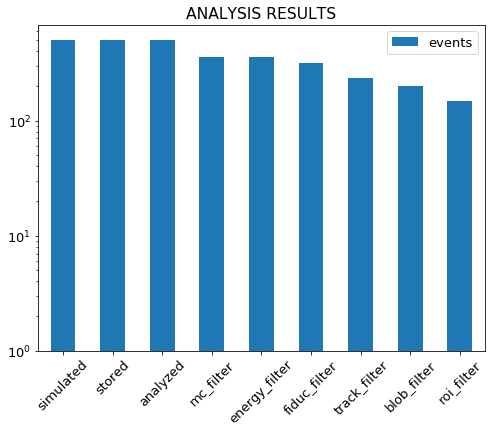

In [14]:
results_df.plot.bar(title = 'ANALYSIS RESULTS', rot=45, log=True)

# DataFrames

In [15]:
evt_cols_to_show = ['mc_energy', 'mc_filter', 'sm_energy', 'energy_filter', 'num_voxels', 'fiduc_filter',
                    'num_tracks', 'track_length', 'track_filter', 'blob1_energy', 'blob2_energy',
                    'blob_filter', 'roi_filter']

In [16]:
# Showing the desired columns from first events
events_df[evt_cols_to_show].head()

,mc_energy,mc_filter,sm_energy,energy_filter,num_voxels,fiduc_filter,num_tracks,track_length,track_filter,blob1_energy,blob2_energy,blob_filter,roi_filter
event_id,,,,,,,,,,,,,
0,2.457830,True,2.442920,True,18,True,1,83.715654,True,0.886702,0.865757,True,False
1,2.457830,True,2.456582,True,31,True,1,99.315921,True,0.682847,0.411475,True,True
2,1.020527,False,NaN,False,-1,False,-1,NaN,False,NaN,NaN,False,False
3,2.328514,False,NaN,False,-1,False,-1,NaN,False,NaN,NaN,False,False
4,2.457830,True,2.467304,True,21,True,3,NaN,False,NaN,NaN,False,False


In [17]:
# Showing just the events that passed the TRACK filter
events_df[events_df.track_filter][evt_cols_to_show]

,mc_energy,mc_filter,sm_energy,energy_filter,num_voxels,fiduc_filter,num_tracks,track_length,track_filter,blob1_energy,blob2_energy,blob_filter,roi_filter
event_id,,,,,,,,,,,,,
0,2.45783,True,2.442920,True,18,True,1,83.715654,True,0.886702,0.865757,True,False
1,2.45783,True,2.456582,True,31,True,1,99.315921,True,0.682847,0.411475,True,True
5,2.45783,True,2.470149,True,19,True,1,124.200045,True,0.799349,0.543241,True,False
7,2.45783,True,2.459115,True,24,True,1,58.535004,True,0.795716,0.382879,True,True
10,2.45783,True,2.464999,True,17,True,1,45.269588,True,1.443346,0.604881,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,2.45783,True,2.460758,True,17,True,1,79.893853,True,1.000756,0.762827,True,True
491,2.45783,True,2.465461,True,16,True,1,100.348932,True,1.217858,0.609607,True,True
493,2.45783,True,2.458700,True,16,True,1,72.461332,True,0.812923,0.774325,True,True


In [18]:
# Showing first tracks
tracks_df.head()

energy     length  num_voxels    t_ext1_x    t_ext1_y  \
event_id track_id                                                            
0        0         2.442920  83.715654          18  316.199402 -311.569519   
1        0         2.456582  99.315921          31  181.914307  337.398102   
4        0         2.220789  81.565220          19         NaN         NaN   
         1         0.146462   0.000000           1         NaN         NaN   
         2         0.100052   0.000000           1         NaN         NaN   

                     t_ext1_z    t_ext2_x    t_ext2_y    t_ext2_z     blob1_x  \
event_id track_id                                                               
0        0         221.003082  342.226501 -288.589630  153.732697  314.970886   
1        0         757.257202  128.015320  349.761017  760.370239  179.846760   
4        0                NaN         NaN         NaN         NaN         NaN   
         1                NaN         NaN         NaN         NaN         NaN   
         2                NaN         NaN         NaN         NaN         NaN   

                     blob1_y     blob1_z  blob1_energy  blob1_num_hits  \
event_id track_id                                                        
0        0        -307.77183  213.355156      0.886702             106   
1        0         336.31182  755.671392      0.682847              79   
4        0               NaN         NaN           NaN               0   
         1               NaN         NaN           NaN               0   
         2               NaN         NaN           NaN               0   

                      blob2_x     blob2_y     blob2_z  blob2_energy  \
event_id track_id                                                     
0        0         342.885033 -287.995491  155.906279      0.865757   
1        0         144.576508  358.703522  786.030273      0.411475   
4        0                NaN         NaN         NaN           NaN   
         1                NaN         NaN         NaN           NaN   
         2                NaN         NaN         NaN           NaN   

                   blob2_num_hits  ovlp_energy  
event_id track_id                               
0        0                    123          0.0  
1        0                     75          0.0  
4        0                      0          NaN  
         1                      0          NaN  
         2                      0          NaN

In [19]:
# Showing first voxels
voxels_df.head()

x           y           z    energy
event_id track_id voxel_id                                              
0        0        0         316.366646 -312.575916  196.901304  0.100109
                  1         316.366646 -312.575916  206.801067  0.090170
                  2         316.366646 -312.575916  216.700830  0.617759
                  3         316.366646 -304.970058  216.700830  0.091499
                  4         324.889244 -312.575916  196.901304  0.076200

# Some graphics

Text(0.5, 1.0, 'Number of reconstructed tracks')

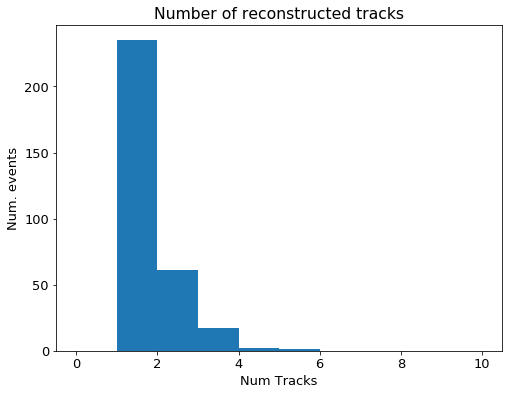

In [20]:
max_num_trks = 10
plt.hist(events_df.num_tracks, max_num_trks, [0, max_num_trks])
plt.xlabel('Num Tracks')
plt.ylabel('Num. events')
plt.title('Number of reconstructed tracks')

Text(0.5, 1.0, 'Track - Length')

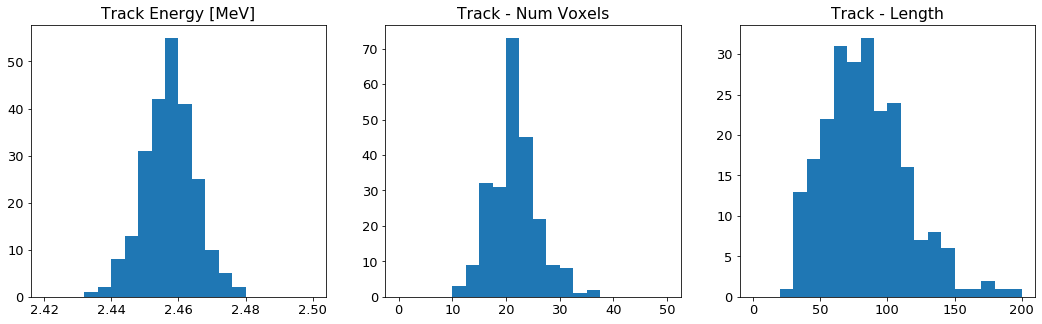

In [21]:
# Plotting energy, length and number of voxels of single track events
evts_to_show = events_df[events_df.num_tracks == 1]

fig = plt.figure(figsize = (18, 5))
E_bins, E_range           = 20, [2.42, 2.50]
voxels_bins, voxels_range = 20, [0, 50]
length_bins, length_range = 20, [0, 200]

# First track plots
ax1 = fig.add_subplot(1, 3, 1)
plt.hist(evts_to_show.sm_energy, E_bins, E_range)
plt.title('Track Energy [MeV]')

ax2 = fig.add_subplot(1, 3, 2)
plt.hist(evts_to_show.num_voxels, voxels_bins, voxels_range)
plt.title('Track - Num Voxels')

ax3 = fig.add_subplot(1, 3, 3)
plt.hist(evts_to_show.track_length, length_bins, length_range)
plt.title('Track - Length')

Text(0.5, 1.0, 'tExtreme-Blob All distance [mm]')

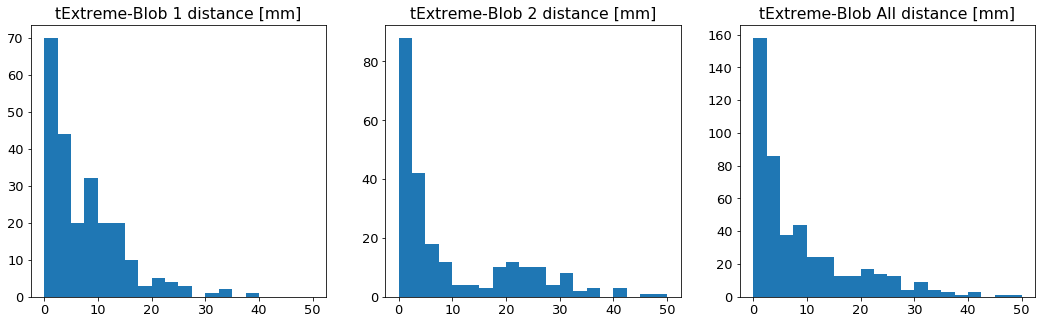

In [22]:
from fanal.utils.types import XYZ

# Plotting distance between True extrema and Blob positions
# of events passing the track_filter
evts_to_show = events_df[events_df.track_filter]
trks_to_show = tracks_df.loc[evts_to_show.index]

# Getting distances
distances_1 = XYZ(trks_to_show.t_ext1_x, trks_to_show.t_ext1_y, trks_to_show.t_ext1_z). \
              distance(XYZ(trks_to_show.blob1_x, trks_to_show.blob1_y, trks_to_show.blob1_z))

distances_2 = XYZ(trks_to_show.t_ext2_x, trks_to_show.t_ext2_y, trks_to_show.t_ext2_z). \
              distance(XYZ(trks_to_show.blob2_x, trks_to_show.blob2_y, trks_to_show.blob2_z))

distances   = pd.concat([distances_1, distances_2])

# PLOTTING
fig = plt.figure(figsize  = (18, 5))
dist_bins, dist_range     = 20, [0., 50.]

# First distance
ax1 = fig.add_subplot(1, 3, 1)
plt.hist(distances_1, dist_bins, dist_range)
plt.title('tExtreme-Blob 1 distance [mm]')

# Second distance
ax2 = fig.add_subplot(1, 3, 2)
plt.hist(distances_2, dist_bins, dist_range)
plt.title('tExtreme-Blob 2 distance [mm]')

# All distances
ax3 = fig.add_subplot(1, 3, 3)
plt.hist(distances, dist_bins, dist_range)
plt.title('tExtreme-Blob All distance [mm]')


Text(0.5, 1.0, 'Blob Energies [MeV]')

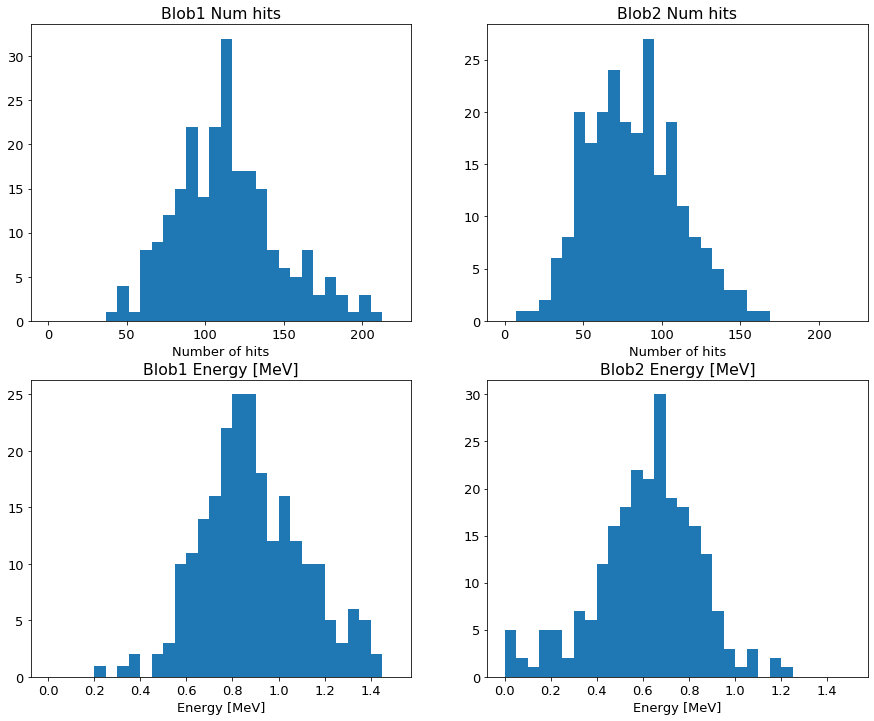

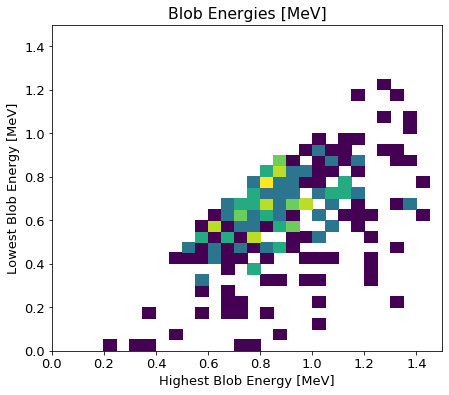

In [23]:
# Plotting blob energies of events passing the track_filter
evts_to_show = events_df[events_df.track_filter]
trks_to_show = tracks_df.loc[evts_to_show.index]

fig = plt.figure(figsize = (15,12))
hit_bins, hit_range = 30, [0., 220]
E_bins, E_range     = 30, [0., 1.50]

ax1 = fig.add_subplot(2, 2, 1)
plt.hist(trks_to_show.blob1_num_hits, hit_bins, hit_range)
plt.xlabel('Number of hits')
plt.title(f'Blob1 Num hits')

ax2 = fig.add_subplot(2, 2, 2)
plt.hist(trks_to_show.blob2_num_hits, hit_bins, hit_range)
plt.xlabel('Number of hits')
plt.title(f'Blob2 Num hits')

ax3 = fig.add_subplot(2, 2, 3)
plt.hist(evts_to_show.blob1_energy, E_bins, E_range)
plt.xlabel('Energy [MeV]')
plt.title(f'Blob1 Energy [MeV]')

ax4 = fig.add_subplot(2, 2, 4)
plt.hist(evts_to_show.blob2_energy, E_bins, E_range)
plt.xlabel('Energy [MeV]')
plt.title(f'Blob2 Energy [MeV]')

fig = plt.figure(figsize = (7,6))
plt.hist2d(evts_to_show.blob1_energy, evts_to_show.blob2_energy, E_bins,
           [E_range, E_range], norm=LogNorm())
plt.xlabel('Highest Blob Energy [MeV]')
plt.ylabel('Lowest Blob Energy [MeV]')
plt.title(f'Blob Energies [MeV]')

Text(0.5, 1.0, 'Event Energy')

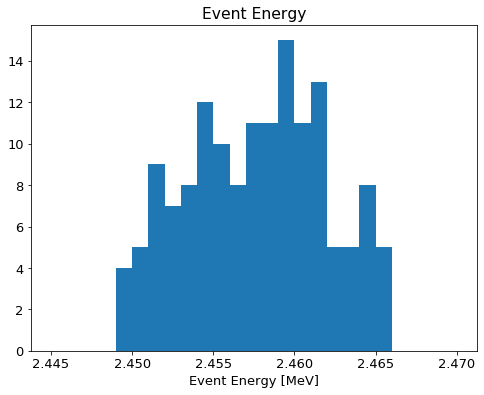

In [24]:
# Plotting event energy of events passing the ROI filter
evts_to_show = events_df[events_df.roi_filter]

E_range = [2.445, 2.470]
E_bins = int((E_range[1] - E_range[0]) / units.keV)

plt.hist(evts_to_show.sm_energy, E_bins, E_range)
plt.xlabel('Event Energy [MeV]')
plt.title((f'Event Energy'))

# Printing and Plotting

#### Show functions

In [25]:
from fanal.utils.mc_utils    import print_mc_event
from fanal.utils.rec_utils   import print_rec_event
from fanal.utils.plot_utils  import plot_mc_event
from fanal.utils.plot_utils  import plot_rec_event

In [26]:
def show_event(event_id     : int,
               input_fname  : str,
               output_fname : str,
               event_type   : str,
               print_mc     : bool = True,
               print_rec    : bool = True,
               plot_mc      : bool = True,
               plot_rec     : bool = True
              ):
    print(f"\n\n*** SHOWING EVENT ID: {event_id} ***\n")
    
    if print_mc : print_mc_event (event_id, input_fname, with_hits=False)
    if print_rec: print_rec_event(event_id, output_fname)
    if plot_mc  : plot_mc_event  (event_id, input_fname, event_type)
    if plot_rec : plot_rec_event (event_id, output_fname)

#### Selecting event ids to show

In [27]:
# Single event
event_ids = 170

# Events that passed the ROI filter
#event_ids = events_df[events_df.roi_filter].index.tolist()

# Events that passed the energy filter but not the fiducial one
#event_ids = events_df[(events_df.energy_filter == True) &
#                      (events_df.fiduc_filter == False)].index.tolist()

# Events with blob oerlap energy > 0
#event_ids = tracks_df[tracks_df.ovlp_energy > 0.].index.get_level_values('event_id').tolist()

print("Event Ids to show:", event_ids)

Event Ids to show: 170


#### Filenames & Event type

In [28]:
input_fname  = config_df.loc['input_fname'].value
output_fname = config_df.loc['output_fname'].value

print(f"Input  file name: {input_fname}")
print(f"Output file name: {output_fname}")

event_type = config_df.loc['event_type'].value
print(f"Event type: {event_type}")

Input  file name: /Users/Javi/Development/FANAL/data/next100/bb0nu/sim/*.h5
Output file name: /Users/Javi/Development/FANAL/data/next100/bb0nu/fanal/fanal.next100.bb0nu.fwhm_07.voxel_10x10x10.h5
Event type: bb0nu


#### Showing events

In [29]:
event_ids = [event_ids] if isinstance(event_ids, int) else event_ids
for event_id in event_ids:
    show_event(event_id,
               input_fname  = input_fname,
               output_fname = output_fname,
               event_type   = event_type,
               print_mc     = False,
               print_rec    = True,
               plot_mc      = False,
               plot_rec     = False)



*** SHOWING EVENT ID: 170 ***


Printing event 170 reconstructed contents ...

* Event id: 170
  mcParts: 4   mcHits: 271   mcE: 2457.830 keV  ->  MC Filter: True
  smE: 2449.298 keV  ->  Energy Filter: True
  Num voxels: 18  of size:  (6.8, 6.8, 6.8) mm
  vetoE: 0.000  ->  Fiduc. Filter: True
  Num tracks: 1  ->  Track Length: 47.9 mm   ->  Track Filter: True
  Blob1 E: 1169.971 keV   Blob2 E: 747.250 keV   ->  Blob Filter: False
  ROI Filter: False

* Tracks:

* Evt Id: 170 , Track id: 0
  Energy: 2449.298 keV   Length: 47.861 mm   Num voxels: 18.0
  True Ext1: (-108.0, 124.4, 913.9)  True Ext2: (-119.1, 87.6, 915.5)
  Blob1: (-109.7, 114.6, 916.9)   Energy: 1169.971 keV   Num hits: 135.0
  Blob2: (-119.7, 86.8, 913.7)   Energy: 747.250 keV   Num hits: 75.0
  Blobs ovlp energy: 20.802 keV 

* Voxels:
                            x           y           z    energy
track_id voxel_id                                              
0        0        -124.424887   88.289107  912.764801  0